# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

0.273490229480639
2.8685737147429484 0.2696397821745697
2.8725745149029804 0.26578501891153006
2.8765753150630125 0.2619260013923279
2.8805761152230445 0.25806279138586624
2.8845769153830765 0.25419545072815464
2.8885777155431085 0.2503240413213195
2.8925785157031405 0.24644862513261315
2.8965793158631725 0.24256926419342192
2.9005801160232045 0.23868602059827343
2.9045809161832365 0.23479895650384244
2.9085817163432686 0.23090813412795622
2.9125825165033006 0.22701361574859838
2.9165833166633326 0.2231154637029123
2.9205841168233646 0.2192137403862031
2.9245849169833966 0.21530850825093906
2.9285857171434286 0.21139982980575198
2.9325865173034606 0.20748776761443657
2.9365873174634927 0.20357238429494912
2.9405881176235247 0.19965374251840504
2.9445889177835567 0.19573190500807597
2.9485897179435887 0.19180693453838563
2.9525905181036207 0.18787889393390508
2.9565913182636527 0.18394784606834713
2.9605921184236847 0.18001385386355995
2.9645929185837168 0.17607698028851995
2.9685937187

5.881176235247049 -0.39126803293698914
5.885177035407081 -0.387583067933165
5.889177835567113 -0.383891899127253
5.893178635727145 -0.38019458560150576
5.897179435887177 -0.37649118653653074
5.901180236047209 -0.3727817612103427
5.905181036207241 -0.3690663689974151
5.9091818363672735 -0.3653450693677297
5.9131826365273055 -0.3616179218858246
5.9171834366873375 -0.35788498620984077
5.9211842368473695 -0.3541463220905674
5.9251850370074015 -0.3504019893704851
5.9291858371674335 -0.34665204798280846
5.9331866373274655 -0.34289655795052637
5.9371874374874976 -0.33913557938544153
5.94118823764753 -0.3353691724872082
5.945189037807562 -0.33159739754236855
5.949189837967594 -0.32782031492338776
5.953190638127626 -0.3240379850876877
5.957191438287658 -0.32025046857667916
5.96119223844769 -0.31645782601479283
5.965193038607722 -0.3126601181085089
5.969193838767754 -0.30885740564538544
5.973194638927786 -0.30504974949308533
5.977195439087818 -0.30123721059840197
5.98119623924785 -0.297419849986

 0.01889565991691221
9.40988197639528 0.01489543350101284
9.413882776555312 0.010894968663136094
9.417883576715344 0.006894329436244628
9.421884376875376 0.002893579856092429
9.425885177035408 -0.0011072160398001565
9.42988597719544 -0.005107994213171436
9.433886777355472 -0.00910869062604339
9.437887577515504 -0.013109241241746688
9.441888377675536 -0.017109582025945685
9.445889177835568 -0.021109648947663377
9.4498899779956 -0.025109377980306314
9.453890778155632 -0.029108705102689418
9.457891578315664 -0.033107566300060745
9.461892378475696 -0.037105897565126125
9.465893178635728 -0.04110363489907368
9.46989397879576 -0.045100714312598225
9.473894778955792 -0.0490970718269255
9.477895579115824 -0.053092643474836235
9.481896379275856 -0.057087365301690035
9.485897179435888 -0.061081173366449075
9.48989797959592 -0.06507400374270154
9.493898779755952 -0.06906579251968488
9.497899579915984 -0.07305647580330878
9.501900380076016 -0.07704598971717784
9.505901180236048 -0.0810342704036141

12.138427685537108 -0.4150001144997104
12.14242848569714 -0.41135678944743637
12.146429285857172 -0.40770688006184036
12.150430086017204 -0.404050444764761
12.154430886177236 -0.4003875420824932
12.158431686337268 -0.39671823064485134
12.1624324864973 -0.39304256918423064
12.166433286657332 -0.38936061653466736
12.170434086817364 -0.38567243163089676
12.174434886977396 -0.3819780735074101
12.178435687137428 -0.3782776012975094
12.18243648729746 -0.37457107423236125
12.186437287457492 -0.3708585516400484
12.190438087617524 -0.36714009294462024
12.194438887777556 -0.3634157576651419
12.198439687937588 -0.35968560541474115
12.20244048809762 -0.3559496958996546
12.206441288257652 -0.35220808891827166
12.210442088417684 -0.3484608443601776
12.214442888577716 -0.3447080222051949
12.218443688737748 -0.34094968252242325
12.22244448889778 -0.33718588546927786
12.226445289057812 -0.3334166912905268
12.230446089217844 -0.3296421603173265
12.234446889377876 -0.3258623529662562
12.238447689537908 -

0.8010261820396901
14.782956591318264 0.798624781408331
14.786957391478296 0.7962105976847879
14.790958191638328 0.7937836695114043
14.79495899179836 0.7913440357345162
14.798959791958392 0.7888917354038302
14.802960592118424 0.7864268077717987
14.806961392278456 0.7839492922929915
14.810962192438488 0.7814592286234642
14.81496299259852 0.7789566566201235
14.818963792758552 0.7764416163400892
14.822964592918584 0.7739141480400534
14.826965393078616 0.7713742921756355
14.830966193238648 0.768822089400735
14.83496699339868 0.7662575805668809
14.838967793558712 0.7636808067225774
14.842968593718744 0.7610918091126475
14.846969393878776 0.758490629177572
14.850970194038808 0.7558773085528272
14.85497099419884 0.7532518890682173
14.858971794358872 0.7506144127472059
14.862972594518904 0.7479649218062425
14.866973394678936 0.7453034586540876
14.870974194838968 0.7426300658911333
14.874974994999 0.7399447863087216
14.878975795159032 0.7372476628884593
14.882976595319064 0.7345387388015304
14.

-0.840380897367967
17.855571114222844 -0.8382057586952667
17.859571914382876 -0.8360172033821966
17.863572714542908 -0.8338152664596061
17.86757351470294 -0.8315999831725356
17.871574314862972 -0.8293713889796522
17.875575115023004 -0.8271295195526829
17.879575915183036 -0.8248744107758428
17.883576715343068 -0.8226060987452612
17.8875775155031 -0.8203246197684039
17.891578315663132 -0.8180300103634915
17.895579115823164 -0.8157223072589155
17.899579915983196 -0.81340154739265
17.903580716143228 -0.8110677679116606
17.90758151630326 -0.8087210061713098
17.911582316463292 -0.8063612997347591
17.915583116623324 -0.803988686372368
17.919583916783356 -0.8016032040610886
17.923584716943388 -0.7992048909838589
17.92758551710342 -0.7967937855289906
17.931586317263452 -0.7943699262895552
17.935587117423484 -0.7919333520627662
17.939587917583516 -0.7894841018493578
17.94358871774355 -0.7870222148529612
17.94758951790358 -0.7845477304794766
17.951590318063612 -0.7820606883364425
17.9555911182236

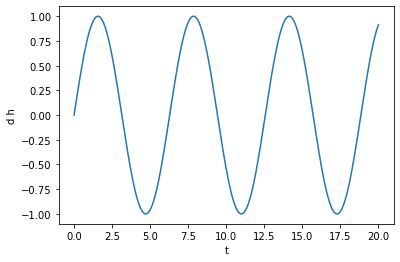

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

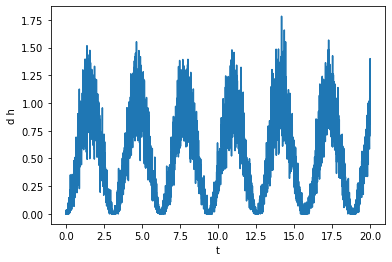

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

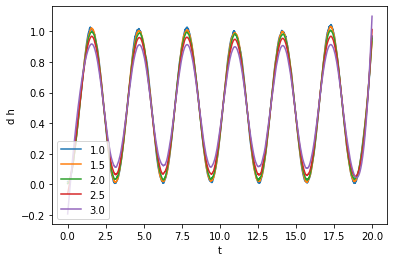

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

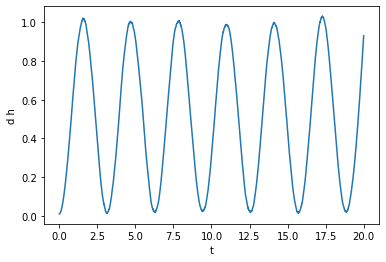

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.2141


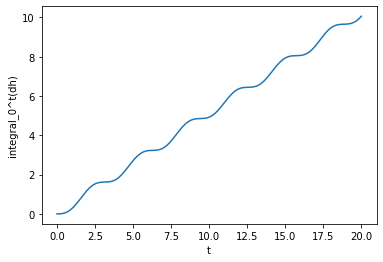

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

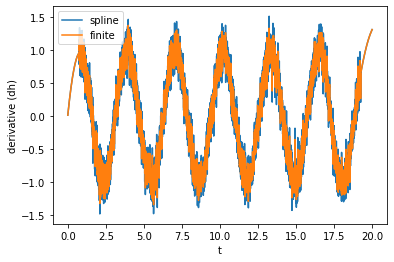

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

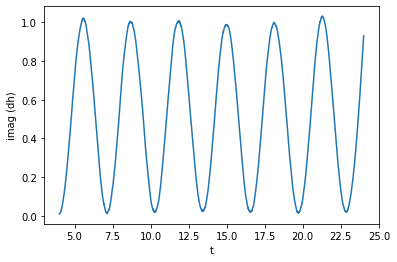

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

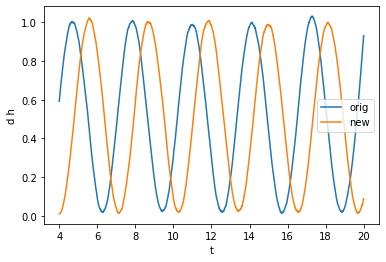

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

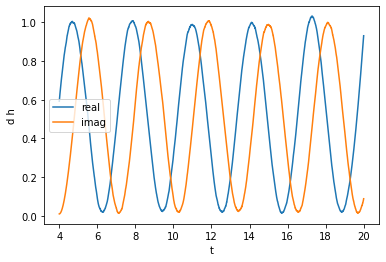

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

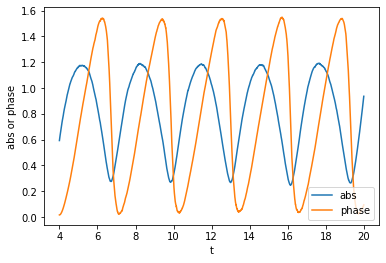

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

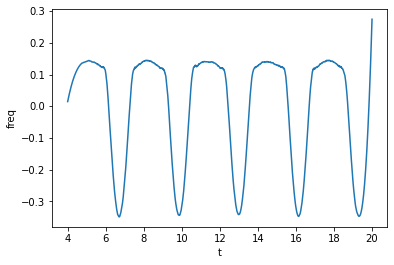

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

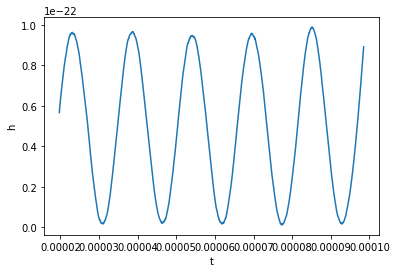

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

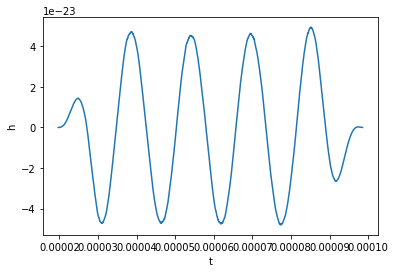

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

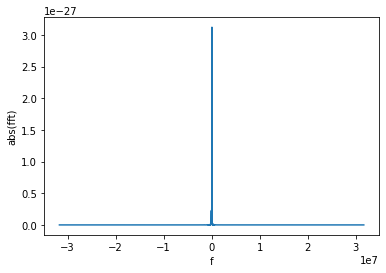

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

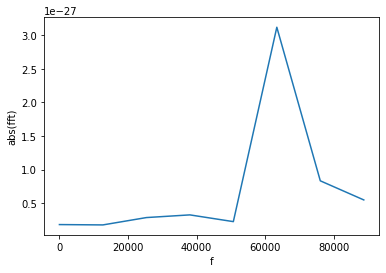

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64175.81


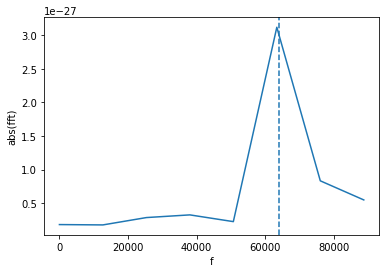

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.121e-27
Maximum with mask 8.316e-28
Length with mask 8
Length after having removed the masked points 7
